# Overpopulation
This notebook will do some data analysis on the **population dataset** and will try to find out whether overpopulation is a real threat or not

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('population.csv')

In [10]:
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92490932.0
1,Arab World,ARB,1961,95044497.0
2,Arab World,ARB,1962,97682294.0
3,Arab World,ARB,1963,100411076.0
4,Arab World,ARB,1964,103239902.0


In [11]:
df.tail()

,Country Name,Country Code,Year,Value
14880,Zimbabwe,ZWE,2012,14710826.0
14881,Zimbabwe,ZWE,2013,15054506.0
14882,Zimbabwe,ZWE,2014,15411675.0
14883,Zimbabwe,ZWE,2015,15777451.0
14884,Zimbabwe,ZWE,2016,16150362.0


In [12]:
df[df['Year'] == 1960].groupby('Year').sum()

,Value
Year,
1960,3.074286e+10


In [13]:
dataframe = df[df['Year'] == 1960].groupby('Year').sum()

In [14]:
dataframe = dataframe.append(df[df['Year'] == 1961].groupby('Year').sum(), )

In [15]:
for i in range(1962,2017):
    dataframe = dataframe.append(df[df['Year'] == i].groupby('Year').sum())

In [16]:
dataframe['Year'] = dataframe.index

In [17]:
dataframe['Value'] = dataframe['Value'].values/10

In [18]:
dataframe

,Value,Year
Year,,
1960,3.074286e+09,1960
1961,3.115285e+09,1961
1962,3.170137e+09,1962
1963,3.238315e+09,1963
1964,3.307214e+09,1964
1965,3.377768e+09,1965
1966,3.452107e+09,1966
1967,3.526311e+09,1967
1968,3.601891e+09,1968


**The following shows that in less than 60 years, world population has gone from 3 billion people to more than 7.5 billion people**

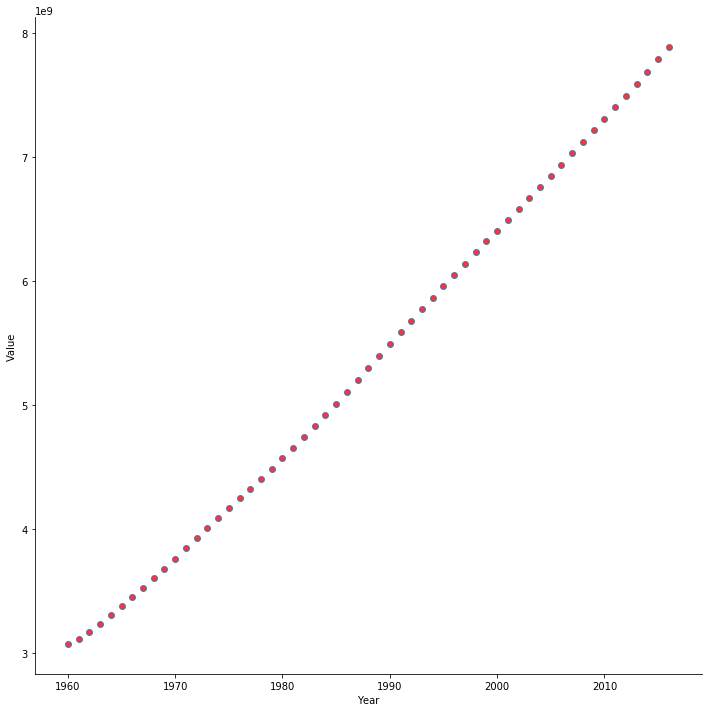

In [19]:
sns.lmplot('Year', 'Value', data=dataframe, size = 10, fit_reg = False,scatter_kws={'facecolors':'red'})

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(dataframe['Year'].reshape(-1,1), dataframe['Value'].reshape(-1,1))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
lr.coef_

array([[87754299.99107017]])

In [24]:
int(lr.predict(2017))

7892955146

the first model predicted that **The World population will reach 10.7 billion people in 2050.**, so what does that mean. 
* World with a human population of 11 billion might put comparatively little extra strain on our planet's resources. (BBC - Earth)
* They say every citizen on this planet in 2050 will be living with 40% less resource than right now. When I say resource, I am talking about food, water, air – 40% less. (Quora)
* “as the population continues to grow, we will be stressed by recurrent shortages of hydrocarbons, metals, water, and, especially, fertilizer. Our global agriculture, though, will clearly bear the greatest stresses.”
*  Agriculture is the world’s biggest commodity problem. Agri-business has the “responsibility for feeding an extra two billion to three billion mouths, an increase of 30% to 40% in just 40 years. The availability of the highest quality land will almost certainly continue to shrink slowly and the quality of typical arable soil will continue to slowly decline globally due to erosion, despite increased efforts to prevent it. This puts a huge burden on increasing productivity.” (Market watch)

In [25]:
int(lr.predict(2050))

10788847046

In [27]:
from sklearn.linear_model import LassoLars

In [28]:
ll = LassoLars()

In [29]:
ll.fit(dataframe['Year'].reshape(-1,1), dataframe['Value'].reshape(-1,1))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)

In [30]:
int(ll.predict(2017))

7892955133

In [31]:
int(ll.predict(2050))

10788847017

In [181]:
predictions = model.predict(np.arange(2017,2060).reshape(-1,1))

In [188]:
predictions = list(predictions)

In [189]:
len(predictions)

43

In [190]:
y = list(dataframe['Value'])

In [191]:
for i in predictions:
    y.append(i)

In [193]:
y = list(y)

In [196]:
len(y)

100

In [199]:
x = np.arange(1960,2060)

In [200]:
len(x)

100

In [211]:
data = pd.DataFrame(y,index=x,columns=['Population'])

In [213]:
data['Year'] = data.index

In [214]:
data.head()

,Population,Year
1960,3.07429e+09,1960
1961,3.11528e+09,1961
1962,3.17014e+09,1962
1963,3.23831e+09,1963
1964,3.30721e+09,1964


Text(0,0.5,'Population')

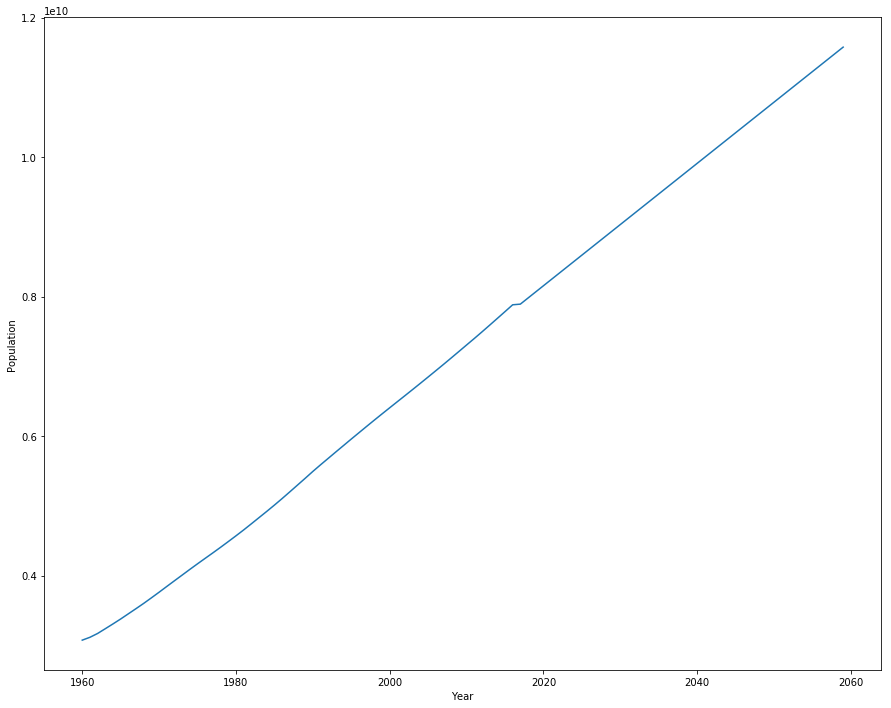

In [222]:
plt.figure(figsize=(15,12))
plt.plot(data['Year'], data['Population'],)
plt.xlabel('Year')
plt.ylabel('Population')